In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))



Using TensorFlow backend.


In [3]:
import os
import os.path
import glob
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import numpy
import tensorflow as tf
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from numpy import argmax
import numpy as np
from numpy.random import RandomState
np.random.seed(1)
from tsne import bh_sne
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'
import numpy as np
np.random.seed(1)
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
#from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model



In [4]:
X = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/DatasetX.npy")
y = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Datasety.npy")
print(X.shape)
print(y.shape)

(9339, 224, 224, 3)
(9339,)


In [5]:
file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/list_fams.pkl', 'rb')
list_fams = pickle.load(file)
file.close()
len(list_fams)

25

# ROC for ResNet-FT-SVM

In [6]:
filename = '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-SVM/ResNet-FT-Features.npy'
if os.path.exists(filename):
    print("Loading ResNet extracted features from %s ..." %(filename))
    vgg16features = np.load(filename)
else:
    print("Extracting features from ResNet layers ...")
    vgg16features = conv_model.predict(X)
    print("Saving ResNet extracted features into %s ..." %(filename))
    np.save(filename, vgg16features)
    
vgg16features.shape

Loading ResNet extracted features from /data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-SVM/ResNet-FT-Features.npy ...


(9339, 2048)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vgg16features, y, test_size=0.301, random_state=42)

In [8]:
from sklearn.calibration import CalibratedClassifierCV
top_model_ = svm.LinearSVC(C=0.01)
clf = CalibratedClassifierCV(top_model_) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


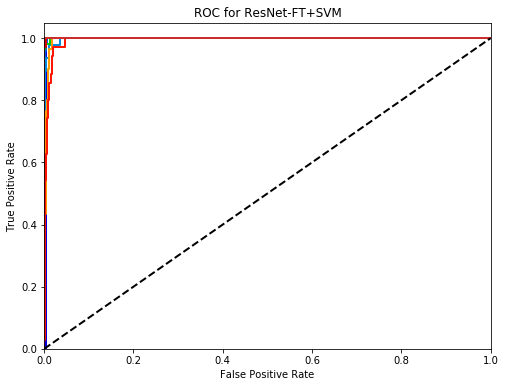

In [9]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = y_test# ground truth labels
y_probas = y_proba# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for ResNet-FT+SVM"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for ResNet-FT+SVM.png")

# ROC for ResNet-FT+Softmax

In [10]:
train_path = '/data/danish/Data/Malimg-Gray-25-Families/Malimg_Grayscale_train/'
test_path  = '/data/danish/Data/Malimg-Gray-25-Families/Malimg_Grayscale_test/'

In [11]:
input_shape=(224,224)
batch_size=32
#save_fn='VGG16-Color='+str(input_shape[:])
#save_fn

In [12]:
datagen_train = ImageDataGenerator(
      rescale=1./255
      #rotation_range=0.1,#180,
      #width_shift_range=0.1,
      #height_shift_range=0.1,
      #shear_range=0.1,
      #zoom_range=0.1,#[0.9, 1.5],
      #horizontal_flip=True,
      #vertical_flip=True,
      #fill_mode='nearest'
                )

generator_train = datagen_train.flow_from_directory(directory=train_path,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',#binary
                                                    #color_mode="rgb",
                                                    #save_prefix='Train_Aug',
                                                    shuffle=True,
                                                    #save_to_dir=save_to_dir,
                                                    seed=42)

steps_train = generator_train.n/ batch_size
print("Steps for Training\n\n",steps_train)

cls_train = generator_train.classes
print("Labels of samples as integer\n\n",cls_train)

Found 6527 images belonging to 25 classes.
Steps for Training

 203.96875
Labels of samples as integer

 [ 0  0  0 ..., 24 24 24]


In [13]:
datagen_test = ImageDataGenerator(rescale=1./255)

generator_test = datagen_test.flow_from_directory(directory=test_path,
                                                  target_size=input_shape,
                                                  class_mode='categorical',
                                                  #color_mode="rgb",
                                                  #save_prefix='Test_Aug',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=42)

steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

cls_test = generator_test.classes
print("Labels of samples as integer\n\n",cls_test)

Found 2812 images belonging to 25 classes.
Steps for Test

 87.875
Labels of samples as integer

 [ 0  0  0 ..., 24 24 24]


In [14]:
from keras.models import load_model
resnet_finetuned = load_model("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-Softmax/ResNet50-FT-Model(loss=SGD).h5")
#resnet_finetuned.summary()

In [15]:
import time
tic = time.time();

cls_pred = resnet_finetuned.predict_generator(generator_test, verbose=1)


toc = time.time();
print ("Elasped Time (s) = ", toc-tic);

88/88 [==============================] - 13s 150ms/step
Elasped Time (s) =  13.186211347579956


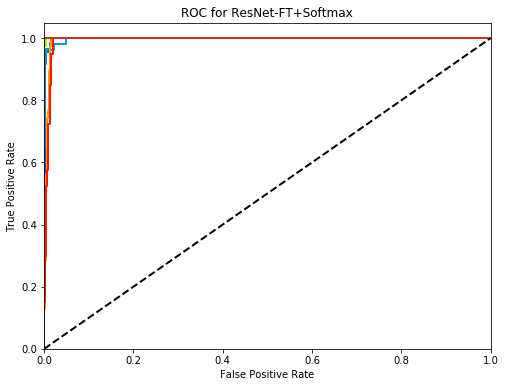

In [16]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = cls_test# ground truth labels
y_probas = cls_pred# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for ResNet-FT+Softmax"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for ResNet-FT+Softmax.png")

# ROC for ResNet-TL+SVM

In [17]:
filename = '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-TL-SVM/ResNet-TL-Features.npy'
if os.path.exists(filename):
    print("Loading ResNet50 extracted features from %s ..." %(filename))
    resnet50_features = np.load(filename)
else:
    print("Extracting features from ResNet50 layers ...")
    resnet50_features = resnet.predict(X)
    print("Saving ResNet50 extracted features into %s ..." %(filename))
    np.save(filename, resnet50_features)

print(resnet50_features.shape)

Loading ResNet50 extracted features from /data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-TL-SVM/ResNet-TL-Features.npy ...
(9339, 2048)


In [18]:
from sklearn.calibration import CalibratedClassifierCV
top_model_ = svm.LinearSVC(C=0.01)
clf = CalibratedClassifierCV(top_model_) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


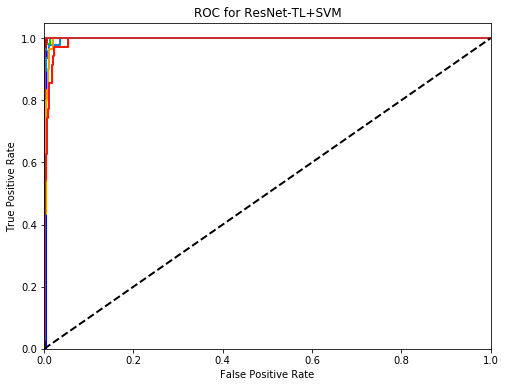

In [19]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = y_test# ground truth labels
y_probas = y_proba# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for ResNet-TL+SVM"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for ResNet-TL+SVM.png")

# ROC for VGG16-TL+SVM

In [20]:
import time


filename = '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-TL-SVM/VGG16-TL-Features.npy'
if os.path.exists(filename):
    print("Loading VGG16 extracted features from %s ..." %(filename))
       
    vgg16features = np.load(filename)
        
else:
    print("Extracting features from VGG16 layers ...")
    tic = time.time();
    vgg16features = conv_model.predict(X)
    toc = time.time();
    print ("Elasped Time (s) = ", toc-tic);
    print("Saving VGG16 extracted features into %s ..." %(filename))
    np.save(filename, vgg16features)



    
vgg16features.shape

Loading VGG16 extracted features from /data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-TL-SVM/VGG16-TL-Features.npy ...


(9339, 4096)

In [21]:
from sklearn.calibration import CalibratedClassifierCV
top_model_ = svm.LinearSVC(C=0.01)
clf = CalibratedClassifierCV(top_model_) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


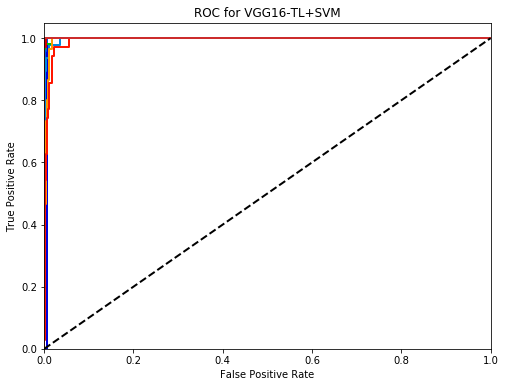

In [22]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = y_test# ground truth labels
y_probas = y_proba# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for VGG16-TL+SVM"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for VGG16-TL+SVM.png")

# ROC for VGG16-FT+Softmax

In [23]:
from keras.models import load_model
CNN = load_model("/data/danish//ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-Softmax/VGG16-FT-Model.h5")
#CNN.summary()

In [24]:
import time
tic = time.time();

cls_pred = CNN.predict_generator(generator_test, verbose=1)

toc = time.time();
print ("Elasped Time (s) = ", toc-tic);

88/88 [==============================] - 12s 138ms/step
Elasped Time (s) =  12.197413206100464


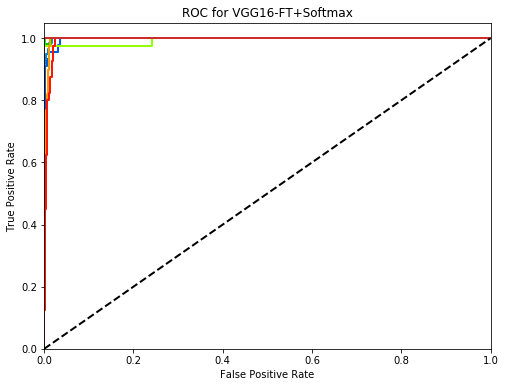

In [25]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = cls_test# ground truth labels
y_probas = cls_pred# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for VGG16-FT+Softmax"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for VGG16-FT+Softmax.png")

# ROC for VGG16-FT+SVM


In [26]:
filename = '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-SVM/VGG16-FT-Features.npy'
if os.path.exists(filename):
    print("Loading VGG16 extracted features from %s ..." %(filename))
    vgg16features = np.load(filename)
else:
    print("Extracting features from VGG16 layers ...")
    vgg16features = conv_model.predict(X)
    print("Saving VGG16 extracted features into %s ..." %(filename))
    np.save(filename, vgg16features)
    
vgg16features.shape

Loading VGG16 extracted features from /data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-SVM/VGG16-FT-Features.npy ...


(9339, 4096)

In [27]:
from sklearn.calibration import CalibratedClassifierCV
top_model_ = svm.LinearSVC(C=0.01)
clf = CalibratedClassifierCV(top_model_) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


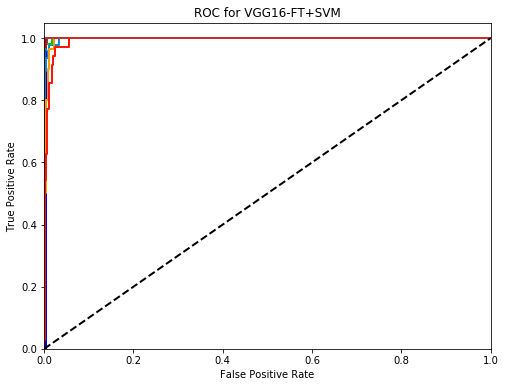

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = y_test# ground truth labels
y_probas = y_proba# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for VGG16-FT+SVM"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for VGG16-FT+SVM.png")

# ROC for Ensemble

In [46]:
from keras.utils import to_categorical
from numpy import dstack
from sklearn.ensemble import RandomForestClassifier




In [47]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(inputX):
    stackX = None

    # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-TL-SVM/VGG16-TL-SVM(pred).pkl', 'rb')
    VGG16_TL_SVM = pickle.load(file)
    file.close()
    
    VGG16_TL_SVM = to_categorical(VGG16_TL_SVM)   
    print(VGG16_TL_SVM.shape)
    if stackX is None:
        stackX = VGG16_TL_SVM
    else:
        stackX = dstack((stackX, VGG16_TL_SVM))
    
    
    
    
    # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-Softmax/VGG16-FT-Softmax(pred).pkl', 'rb')
    VGG16_FT_Softmax = pickle.load(file)
    file.close()
    
    VGG16_FT_Softmax = to_categorical(VGG16_FT_Softmax) 
    print(VGG16_FT_Softmax.shape)
    if stackX is None:
        stackX = VGG16_FT_Softmax
    else:
        stackX = dstack((stackX, VGG16_FT_Softmax))
        
        
    '''
    # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-FT-SVM/VGG16-FT-SVM(pred).pkl', 'rb')
    VGG16_FT_SVM = pickle.load(file)
    file.close()
    
    VGG16_FT_SVM = to_categorical(VGG16_FT_SVM) 
    print(VGG16_FT_SVM.shape)
    if stackX is None:
        stackX = VGG16_FT_SVM
    else:
        stackX = dstack((stackX, VGG16_FT_SVM))
    
    '''
    
    # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-TL-SVM/ResNet-TL-SVM(pred).pkl', 'rb')
    ResNet_TL_SVM = pickle.load(file)
    file.close()
    
    ResNet_TL_SVM = to_categorical(ResNet_TL_SVM)
    print(ResNet_TL_SVM.shape)
    if stackX is None:
        stackX = ResNet_TL_SVM
    else:
        stackX = dstack((stackX, ResNet_TL_SVM))
        
        
     # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-Softmax/ResNet-FT-Softmax(pred).pkl', 'rb')
    ResNet_FT_Softmax = pickle.load(file)
    file.close()
        
    ResNet_FT_Softmax = to_categorical(ResNet_FT_Softmax)
    print(ResNet_FT_Softmax.shape)
    if stackX is None:
        stackX = ResNet_FT_Softmax
    else:
        stackX = dstack((stackX, ResNet_FT_Softmax))
    
    
    '''
     # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/ResNet-FT-SVM/ResNet-FT-SVM(pred).pkl', 'rb')
    ResNet_FT_SVM = pickle.load(file)
    file.close()
        
    ResNet_FT_SVM = to_categorical(ResNet_FT_SVM)
    print(ResNet_FT_SVM.shape)
    if stackX is None:
        stackX = ResNet_FT_SVM
    else:
        stackX = dstack((stackX, ResNet_FT_SVM))
    
    '''
    
        
        # stack predictions into [rows, members, probabilities]
    file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/VGG16-ResNet-SVM/VGG16-ResNet50-SVM(pred).pkl', 'rb')
    VGG16_ResNet_TL_SVM = pickle.load(file)
    file.close()
    
    VGG16_ResNet_TL_SVM = to_categorical(VGG16_ResNet_TL_SVM)   
    print(VGG16_ResNet_TL_SVM.shape)
    if stackX is None:
        stackX = VGG16_ResNet_TL_SVM
    else:
        stackX = dstack((stackX, VGG16_ResNet_TL_SVM))
        
        
   
    # flatten predictions to [rows, members x probabilities]
    print(stackX.shape)
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    print(stackX.shape)
    return stackX

In [48]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(inputX)
    # fit standalone model
    #model = LogisticRegression()
    #model = KNeighborsClassifier(n_neighbors=3)
    model = RandomForestClassifier()
    #model = MultinomialNB()
    #model = DecisionTreeClassifier()
    #model = MLPClassifier()
    #model = linear_model.LinearRegression()
    #model = svm.LinearSVC
    #model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    #model = XGBClassifier()
    #model = GaussianNB
    #inputy = argmax(inputy, axis=1)
    model.fit(stackedX, inputy)
    return model

In [49]:
# make a prediction with the stacked model
def stacked_prediction(model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(inputX)
	# make a prediction
	yhat = model.predict_proba(stackedX)
	return yhat

In [50]:

# fit stacked model using the ensemble
model = fit_stacked_model(X_test, y_test)

(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25, 5)
(2812, 125)


/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
yhat = stacked_prediction(model, X_test)

(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25)
(2812, 25, 5)
(2812, 125)


In [52]:
yhat

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

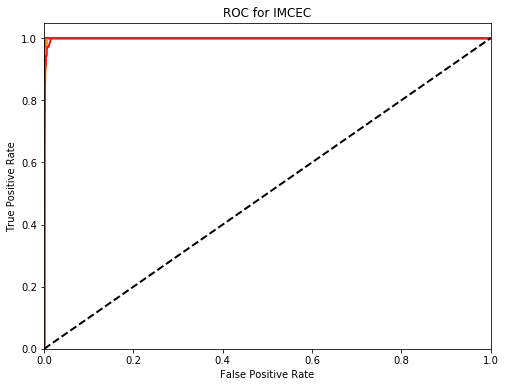

In [53]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = y_test# ground truth labels
y_probas = yhat# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for IMCEC"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for IMCECe.png")